In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pymongo
import sys
import json

import os

In [205]:
df=pd.read_csv('Motor_vehicle_insurance_data.csv',sep=';')
for col in df.columns:
    if df[col].isnull().sum()>0:
        print(f"Column {col} has {df[col].isnull().sum()} null values")

Column Date_lapse has 70408 null values
Column Type_fuel has 1764 null values
Column Length has 10329 null values


In [206]:
df['Length']=df['Length'].fillna(df['Length'].mean())
df['Type_fuel']=df['Type_fuel'].fillna(df['Type_fuel'].mode()[0])


In [207]:
df.shape

(105555, 30)

In [208]:
df.head()

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,...,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,1,05/11/2015,05/11/2015,05/11/2016,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,4.252007,190
1,1,05/11/2015,05/11/2016,05/11/2017,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,4.252007,190
2,1,05/11/2015,05/11/2017,05/11/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,4.252007,190
3,1,05/11/2015,05/11/2018,05/11/2019,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,4.252007,190
4,2,26/09/2017,26/09/2017,26/09/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,4.252007,190


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105555 entries, 0 to 105554
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    105555 non-null  int64  
 1   Date_start_contract   105555 non-null  object 
 2   Date_last_renewal     105555 non-null  object 
 3   Date_next_renewal     105555 non-null  object 
 4   Date_birth            105555 non-null  object 
 5   Date_driving_licence  105555 non-null  object 
 6   Distribution_channel  105555 non-null  object 
 7   Seniority             105555 non-null  int64  
 8   Policies_in_force     105555 non-null  int64  
 9   Max_policies          105555 non-null  int64  
 10  Max_products          105555 non-null  int64  
 11  Lapse                 105555 non-null  int64  
 12  Date_lapse            35147 non-null   object 
 13  Payment               105555 non-null  int64  
 14  Premium               105555 non-null  float64
 15  

In [157]:
df[['Premium',
 'Seniority',
 'Policies_in_force',
 'Max_policies',
 'Max_products',
 'Lapse',
 'Payment',
 'N_claims_year',
 'N_claims_history',
 'Type_risk',
 'Area',
 'Second_driver',
 'Year_matriculation',
 'Power',
 'Cylinder_capacity',
 'N_doors',
 'Weight']].corr()

,Premium,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Payment,N_claims_year,N_claims_history,Type_risk,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,N_doors,Weight
Premium,1.000000,-0.069821,-0.092465,-0.077578,-0.090041,0.055217,0.249236,0.092688,0.117130,0.279959,0.060963,0.143470,0.307960,0.431741,0.277018,0.341438,0.298807
Seniority,-0.069821,1.000000,0.048138,0.248679,0.232416,-0.058257,-0.163989,-0.043957,0.430183,0.016395,-0.004360,-0.076370,-0.124213,-0.058818,0.017164,-0.034382,0.026745
Policies_in_force,-0.092465,0.048138,1.000000,0.790420,0.162403,0.198977,0.020921,0.176735,0.233066,-0.109220,-0.038973,0.048972,-0.137361,-0.058308,-0.014222,-0.107895,-0.015870
Max_policies,-0.077578,0.248679,0.790420,1.000000,0.322403,0.178897,-0.001041,0.158704,0.403990,-0.108234,-0.028996,0.022671,-0.131843,-0.043111,0.000429,-0.102973,-0.001553
Max_products,-0.090041,0.232416,0.162403,0.322403,1.000000,0.025435,-0.055648,-0.000132,0.167000,-0.166024,0.029384,-0.027481,-0.160210,-0.150711,-0.112704,-0.176379,-0.115366
Lapse,0.055217,-0.058257,0.198977,0.178897,0.025435,1.000000,0.068861,-0.011383,0.086604,-0.013483,0.032560,-0.014964,-0.097535,-0.008677,0.025658,-0.031179,-0.000540
Payment,0.249236,-0.163989,0.020921,-0.001041,-0.055648,0.068861,1.000000,0.111551,0.045726,0.148835,0.032866,0.052229,0.044399,0.142229,0.122900,0.158857,0.116353
N_claims_year,0.092688,-0.043957,0.176735,0.158704,-0.000132,-0.011383,0.111551,1.000000,0.392514,0.022593,0.032624,0.032343,0.001116,0.063777,0.081607,0.050852,0.072789
N_claims_history,0.117130,0.430183,0.233066,0.403990,0.167000,0.086604,0.045726,0.392514,1.000000,0.031386,0.053519,-0.017038,-0.025390,0.078483,0.095709,0.060078,0.089231
Type_risk,0.279959,0.016395,-0.109220,-0.108234,-0.166024,-0.013483,0.148835,0.022593,0.031386,1.000000,-0.026711,0.134113,0.131029,0.495786,0.504416,0.627970,0.520523


In [130]:
data=df.to_dict(orient='records')
DB_NAME = "VehicleInsurance"
COLLECTION_NAME = "Proj1-Data"
CONNECTION_URL = "mongodb+srv://joshisparsh:url"

# above, either remove your credentials or delete the mongoDB resource bofore pushing it to github.

In [ ]:
client = pymongo.MongoClient(CONNECTION_URL)
data_base = client[DB_NAME]
collection = data_base[COLLECTION_NAME]

In [54]:
from pymongo.errors import AutoReconnect
import time

MAX_RETRIES = 5
RETRY_DELAY = 3
batch_size = 50

for i in range(0, len(data), batch_size):
    batch = data[i:i+batch_size]
    for attempt in range(3):  # Retry max 3 times
        try:
            collection.insert_many(batch)
            print(f"✅ Inserted batch {i//batch_size + 1}")
            time.sleep(0.3)
            break
        except AutoReconnect as e:
            print(f"⚠️ Retry {attempt + 1} for batch {i//batch_size + 1}: {e}")
            time.sleep(2)
        except Exception as e:
            print(f"❌ Failed batch {i//batch_size + 1}: {e}")
            break


NameError: name 'data' is not defined

In [158]:
int_cat=[]
float_cat=[]
object_cat=[]
for col in df.columns:
    if df[col].dtype=='int64':
        int_cat.append(col)
    elif df[col].dtype=='float64':
        float_cat.append(col)
    elif df[col].dtype=='object':
        object_cat.append(col)
        
boolean_cat = []
categorical_cat = []
for col in object_cat:
    # Check if all non-null values are boolean
    if df[col].isin([True, False]).all():
        boolean_cat.append(col)
    else:
        categorical_cat.append(col)
            

In [159]:
int_cat

['ID',
 'Seniority',
 'Policies_in_force',
 'Max_policies',
 'Max_products',
 'Lapse',
 'Payment',
 'N_claims_year',
 'N_claims_history',
 'Type_risk',
 'Area',
 'Second_driver',
 'Year_matriculation',
 'Power',
 'Cylinder_capacity',
 'N_doors',
 'Weight']

In [160]:
float_cat

['Premium', 'Cost_claims_year', 'R_Claims_history', 'Value_vehicle', 'Length']

In [161]:
boolean_cat

[]

In [162]:
categorical_cat  #obj type columns  , including date columns

['Date_start_contract',
 'Date_last_renewal',
 'Date_next_renewal',
 'Date_birth',
 'Date_driving_licence',
 'Distribution_channel',
 'Date_lapse',
 'Type_fuel']

In [163]:
df.columns

Index(['ID', 'Date_start_contract', 'Date_last_renewal', 'Date_next_renewal',
       'Date_birth', 'Date_driving_licence', 'Distribution_channel',
       'Seniority', 'Policies_in_force', 'Max_policies', 'Max_products',
       'Lapse', 'Date_lapse', 'Payment', 'Premium', 'Cost_claims_year',
       'N_claims_year', 'N_claims_history', 'R_Claims_history', 'Type_risk',
       'Area', 'Second_driver', 'Year_matriculation', 'Power',
       'Cylinder_capacity', 'Value_vehicle', 'N_doors', 'Type_fuel', 'Length',
       'Weight'],
      dtype='object')

In [164]:
count=0
for entry in df['Cost_claims_year']:
    if entry==0:
       count+=1
print(f"Number of zero entries in Cost_claims_year: {count}") 
print(f"Percentage of zero entries in Cost_claims_year: {count/len(df)*100:.2f}%")  
df['Cost_claims_year'].describe()

Number of zero entries in Cost_claims_year: 85909
Percentage of zero entries in Cost_claims_year: 81.39%


count    105555.000000
mean        153.557305
std        1477.112362
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      260853.240000
Name: Cost_claims_year, dtype: float64

In [165]:
target1=df['Cost_claims_year']
df.drop(columns=['Cost_claims_year','ID','R_Claims_history'],inplace=True)
target2=df['Premium']
df.drop(columns=['Premium'],inplace=True)

In [166]:
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer


In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, target1, test_size=0.2, random_state=42)
X_train,X_test,y_train2,y_test2=train_test_split(df,target2,test_size=0.2,random_state=42)
# Only apply to numeric columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    if skew(X_train[col]) > 0.5:
        pt = PowerTransformer(method='yeo-johnson')
        X_train[col] = pt.fit_transform(X_train[[col]])
        X_test[col] = pt.transform(X_test[[col]])
        print(f"Applied PowerTransformer to {col} due to skewness: {skew(X_train[col])}")
    else:
        print(f"No transformation needed for {col}, skewness: {skew(X_train[col])}")



Applied PowerTransformer to Seniority due to skewness: 0.05444350831259429
Applied PowerTransformer to Policies_in_force due to skewness: 0.9456679426676924
Applied PowerTransformer to Max_policies due to skewness: 0.2673094288574609
Applied PowerTransformer to Max_products due to skewness: 3.6746648507883903
Applied PowerTransformer to Lapse due to skewness: 1.472717672223253
Applied PowerTransformer to Payment due to skewness: 0.7743166115103546
Applied PowerTransformer to N_claims_year due to skewness: 1.6088909657584936
Applied PowerTransformer to N_claims_history due to skewness: 0.11403836467920073
No transformation needed for Type_risk, skewness: -1.835814002150655
Applied PowerTransformer to Area due to skewness: 1.014344155545996
Applied PowerTransformer to Second_driver due to skewness: 2.2752554790764794
No transformation needed for Year_matriculation, skewness: -1.4255839830468513
No transformation needed for Power, skewness: 0.39582614580794234
No transformation needed for

In [168]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (84444, 26)
X_test shape: (21111, 26)


In [169]:
y_train = np.log1p(y_train)

In [170]:
import pandas as pd
import numpy as np
from datetime import datetime
def feature_engineering(df):
    """
    Perform feature engineering on the DataFrame.
    """
    today = datetime(2020, 1, 1)
    
    df['Insurance_status'] = df['Date_lapse'].isna().astype(int)
    
    df['Date_lapse'] = pd.to_datetime(df['Date_lapse'], errors='coerce')

    df['Date_lapse'] = df['Date_lapse'].fillna(today)
    df['Date_lapse'] = df['Date_lapse'].mask(df['Date_lapse'] > today, today)

    # Convert relevant date columns safely
    df['Date_lapse'] = pd.to_datetime(df['Date_lapse'], dayfirst=True, errors='coerce')
    df['Date_start_contract'] = pd.to_datetime(df['Date_start_contract'], dayfirst=True, errors='coerce')
    df['Date_driving_licence'] = pd.to_datetime(df['Date_driving_licence'], dayfirst=True, errors='coerce')
    df['Date_last_renewal'] = pd.to_datetime(df['Date_last_renewal'], dayfirst=True, errors='coerce')
    df['Date_next_renewal'] = pd.to_datetime(df['Date_next_renewal'], dayfirst=True, errors='coerce')

    # Age since lapse (if lapsed)
    df['Age'] = ((today - df['Date_lapse']).dt.days // 365).fillna(0).astype(int)

    # Vehicle age
    df['Vehicle_age'] = today.year - df['Year_matriculation'] if 'Year_matriculation' in df.columns else np.nan

    # Insurance duration (from start to lapse or today if not lapsed)
    df['Insurance_duration'] = ((df['Date_lapse'].fillna(today) - df['Date_start_contract']).dt.days//30).fillna(0).astype(int)

    # Licence age
    df['Licence_age'] = ((today - df['Date_driving_licence']).dt.days // 365).fillna(0).astype(int)

    # Insurance status (1 = active, 0 = terminated)
    

    # Time between renewals
    df['next_claim_duration'] = (
        (df['Date_next_renewal'] - df['Date_last_renewal']).dt.days
    ).fillna(0).astype(int)

    # Drop unneeded date columns
    df = df.drop(columns=[
        'Date_start_contract',
        'Date_last_renewal',
        'Date_next_renewal',
        'Date_driving_licence',
        'Date_birth',
        'Date_lapse',
        'next_claim_duration'
    ], errors='ignore')

    return df
x_train_engineered = feature_engineering(X_train)
x_test_engineered=feature_engineering(X_test)

C:\Users\joshi\AppData\Local\Temp\ipykernel_18780\2270996688.py:12: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_lapse'] = pd.to_datetime(df['Date_lapse'], errors='coerce')


In [173]:
sns.heatmap('x_test')

ValueError: Must pass 2-d input. shape=()

In [119]:

x_train_engineered.shape

(84444, 25)

In [120]:
x_train_engineered.columns

Index(['Distribution_channel', 'Seniority', 'Policies_in_force',
       'Max_policies', 'Max_products', 'Lapse', 'Payment', 'N_claims_year',
       'N_claims_history', 'Type_risk', 'Area', 'Second_driver',
       'Year_matriculation', 'Power', 'Cylinder_capacity', 'Value_vehicle',
       'N_doors', 'Type_fuel', 'Length', 'Weight', 'Insurance_status', 'Age',
       'Vehicle_age', 'Insurance_duration', 'Licence_age'],
      dtype='object')

In [121]:
for cols in x_train_engineered.columns:
    if x_train_engineered[cols].dtype == 'object':
        print(f"Column {cols} is of type object")

Column Distribution_channel is of type object
Column Type_fuel is of type object


In [122]:
x_train_engineered.head()

,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Payment,N_claims_year,N_claims_history,Type_risk,...,Value_vehicle,N_doors,Type_fuel,Length,Weight,Insurance_status,Age,Vehicle_age,Insurance_duration,Licence_age
72716,0,1.372321,-0.636621,1.605094,4.564057e-14,1.976297,-0.685172,-0.479122,2.228741,2,...,0.397134,5,D,1.518043,1.177519,0,2,12,36,19
95053,1,0.117199,-0.636621,1.271643,-2.959438e-15,-0.505509,1.459488,2.043115,0.641536,2,...,0.330163,4,D,1.121606,1.068384,1,0,17,64,28
98446,1,-0.523140,-0.636621,-0.968268,-2.959438e-15,-0.505509,1.459488,2.122085,0.325574,3,...,0.192534,3,P,0.176213,-0.090149,1,0,11,39,16
41836,1,-1.821256,-0.636621,-0.968268,-2.959438e-15,-0.505509,-0.685172,-0.479122,-1.179999,3,...,-0.723057,3,D,-1.597379,-0.664788,0,3,19,11,29
16050,1,-0.523140,1.470201,1.271643,-2.959438e-15,-0.505509,1.459488,-0.479122,0.641536,3,...,0.594510,5,D,0.195369,0.197195,1,0,16,29,41


In [123]:
x_test_engineered.head()

,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Payment,N_claims_year,N_claims_history,Type_risk,...,Value_vehicle,N_doors,Type_fuel,Length,Weight,Insurance_status,Age,Vehicle_age,Insurance_duration,Licence_age
40515,1,-0.523140,1.470201,1.271643,-2.959438e-15,-0.505509,-0.685172,-0.479122,-1.179999,3,...,0.773724,5,D,0.886165,0.454309,0,1,4,32,12
28723,1,-1.028494,1.470201,0.624821,-2.959438e-15,-0.505509,-0.685172,-0.479122,-1.179999,3,...,0.729416,5,P,1.286601,0.528947,1,0,16,30,27
62581,0,0.340416,-0.636621,-0.968268,-2.959438e-15,-0.505509,-0.685172,-0.479122,-0.170896,3,...,0.681795,5,D,-0.207447,0.164918,1,0,18,74,24
103419,1,-0.160864,1.470201,1.271643,-2.959438e-15,-0.505509,-0.685172,2.131826,1.180397,3,...,0.395042,4,D,1.286601,0.658670,0,0,19,44,27
81627,0,0.340416,-0.636621,-0.968268,-2.959438e-15,-0.505509,-0.685172,-0.479122,-0.170896,3,...,0.353555,4,P,0.947099,0.141227,1,0,11,77,47


In [124]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Only include columns that exist in x_train_engineered
categorical_cat = ['Distribution_channel', 'Type_fuel']

# Convert categorical columns to string type to avoid dtype issues
x_train_engineered[categorical_cat] = x_train_engineered[categorical_cat].astype(str)

encoder = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse_output=False, drop=None,handle_unknown='ignore'), categorical_cat)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)
# Now you can check dtypes

x_train_encoded = encoder.fit_transform(x_train_engineered)
x_test_encoded=encoder.transform(x_test_engineered)
# Convert encoded NumPy array to DataFrame
feature_names = encoder.get_feature_names_out()


In [125]:
x_train_encoded_df = pd.DataFrame(x_train_encoded, columns=feature_names)
x_test_encoded_df = pd.DataFrame(x_test_encoded, columns=feature_names)
# Check for object-type columns
for col in x_train_encoded_df.columns:
    if x_train_encoded_df[col].dtype == 'object':
        print(f"Column {col} is of type object")
# Fit and transform the training data
x_train_encoded_df

,Distribution_channel_0,Distribution_channel_00/01/1900,Distribution_channel_1,Type_fuel_D,Type_fuel_P,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,...,Cylinder_capacity,Value_vehicle,N_doors,Length,Weight,Insurance_status,Age,Vehicle_age,Insurance_duration,Licence_age
0,1.0,0.0,0.0,1.0,0.0,1.372321,-0.636621,1.605094,4.564057e-14,1.976297,...,1998.0,0.397134,5.0,1.518043,1.177519,0.0,2.0,12.0,36.0,19.0
1,0.0,0.0,1.0,1.0,0.0,0.117199,-0.636621,1.271643,-2.959438e-15,-0.505509,...,2148.0,0.330163,4.0,1.121606,1.068384,1.0,0.0,17.0,64.0,28.0
2,0.0,0.0,1.0,0.0,1.0,-0.523140,-0.636621,-0.968268,-2.959438e-15,-0.505509,...,1598.0,0.192534,3.0,0.176213,-0.090149,1.0,0.0,11.0,39.0,16.0
3,0.0,0.0,1.0,1.0,0.0,-1.821256,-0.636621,-0.968268,-2.959438e-15,-0.505509,...,1527.0,-0.723057,3.0,-1.597379,-0.664788,0.0,3.0,19.0,11.0,29.0
4,0.0,0.0,1.0,1.0,0.0,-0.523140,1.470201,1.271643,-2.959438e-15,-0.505509,...,1590.0,0.594510,5.0,0.195369,0.197195,1.0,0.0,16.0,29.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84439,1.0,0.0,0.0,1.0,0.0,-0.160864,-0.636621,-0.968268,-2.959438e-15,-0.505509,...,1998.0,1.289626,4.0,0.769947,0.464981,0.0,2.0,16.0,36.0,24.0
84440,0.0,0.0,1.0,1.0,0.0,-0.160864,-0.636621,-0.968268,-2.959438e-15,-0.505509,...,1686.0,-0.721065,3.0,-1.255782,-0.356188,0.0,2.0,19.0,36.0,21.0
84441,0.0,0.0,1.0,0.0,1.0,-0.160864,-0.636621,1.271643,-2.959438e-15,-0.505509,...,1390.0,-0.964481,5.0,-1.262528,-0.356188,1.0,0.0,21.0,42.0,31.0
84442,1.0,0.0,0.0,0.0,1.0,0.340416,-0.636621,0.624821,-2.959438e-15,-0.505509,...,2119.0,0.056972,4.0,0.681962,-0.159690,0.0,1.0,31.0,48.0,42.0


In [126]:
x_train_encoded

array([[  1.,   0.,   0., ...,  12.,  36.,  19.],
       [  0.,   0.,   1., ...,  17.,  64.,  28.],
       [  0.,   0.,   1., ...,  11.,  39.,  16.],
       ...,
       [  0.,   0.,   1., ...,  21.,  42.,  31.],
       [  1.,   0.,   0., ...,  31.,  48.,  42.],
       [  1.,   0.,   0., ...,  19., 133.,  42.]], shape=(84444, 28))

In [127]:
x_test_encoded_df.head()

,Distribution_channel_0,Distribution_channel_00/01/1900,Distribution_channel_1,Type_fuel_D,Type_fuel_P,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,...,Cylinder_capacity,Value_vehicle,N_doors,Length,Weight,Insurance_status,Age,Vehicle_age,Insurance_duration,Licence_age
0,0.0,0.0,1.0,1.0,0.0,-0.523140,1.470201,1.271643,-2.959438e-15,-0.505509,...,1598.0,0.773724,5.0,0.886165,0.454309,0.0,1.0,4.0,32.0,12.0
1,0.0,0.0,1.0,0.0,1.0,-1.028494,1.470201,0.624821,-2.959438e-15,-0.505509,...,1998.0,0.729416,5.0,1.286601,0.528947,1.0,0.0,16.0,30.0,27.0
2,1.0,0.0,0.0,1.0,0.0,0.340416,-0.636621,-0.968268,-2.959438e-15,-0.505509,...,1896.0,0.681795,5.0,-0.207447,0.164918,1.0,0.0,18.0,74.0,24.0
3,0.0,0.0,0.0,1.0,0.0,-0.160864,1.470201,1.271643,-2.959438e-15,-0.505509,...,1998.0,0.395042,4.0,1.286601,0.658670,0.0,0.0,19.0,44.0,27.0
4,0.0,0.0,0.0,0.0,1.0,0.340416,-0.636621,-0.968268,-2.959438e-15,-0.505509,...,1598.0,0.353555,4.0,0.947099,0.141227,1.0,0.0,11.0,77.0,47.0


In [128]:
x_test_encoded_df['Seniority']

0       -0.523140
1       -1.028494
2        0.340416
3       -0.160864
4        0.340416
           ...   
21106    0.117199
21107    0.117199
21108    0.818012
21109    0.818012
21110   -1.028494
Name: Seniority, Length: 21111, dtype: float64

In [129]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = [
    'Seniority',
    'Policies_in_force',
    'Max_policies',
    'Max_products',
    'Lapse',
    'Payment',
    'Premium',
    'Power',
    'Cylinder_capacity',
    'Value_vehicle',
    'N_doors',
    'Length',
    'Weight',
    'Age',
    'Vehicle_age',
    'Insurance_duration',
    'Licence_age'
]

# Scale each column in training data
for col in columns_to_scale:
    scaler = StandardScaler()
    x_train_encoded_df[col] = scaler.fit_transform(x_train_encoded_df[[col]])
    x_test_encoded_df[col] = scaler.transform(x_test_encoded_df[[col]])


KeyError: "None of [Index(['Premium'], dtype='object')] are in the [columns]"

In [ ]:
x_train_encoded.shape

(84444, 29)

In [ ]:
y_train

72716     0.000000
95053     4.348082
98446     6.371492
41836     0.000000
16050     0.000000
            ...   
54886     0.000000
76820     0.000000
103694    0.000000
860       5.071166
15795     4.156850
Name: Cost_claims_year, Length: 84444, dtype: float64

In [ ]:
X_train_new, X_val, y_train_new, y_val = train_test_split(
    x_train_encoded_df, y_train, test_size=0.2, random_state=42
)


In [ ]:
X_train_new.head()

,Distribution_channel_0,Distribution_channel_00/01/1900,Distribution_channel_1,Type_fuel_D,Type_fuel_P,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,...,Cylinder_capacity,Value_vehicle,N_doors,Length,Weight,Insurance_status,Age,Vehicle_age,Insurance_duration,Licence_age
81311,0.0,0.0,1.0,1.0,0.0,0.117199,-0.636621,-0.968268,-0.254507,1.976297,...,0.112317,0.358297,0.616619,0.068451,0.261656,0.0,2.435548,-0.039115,-0.184143,1.135801
70733,1.0,0.0,0.0,1.0,0.0,1.790099,-0.636621,1.605094,-0.254507,-0.505509,...,0.628372,1.506172,0.616619,1.252123,0.836585,0.0,1.418148,-0.039115,-0.981061,0.095406
49066,1.0,0.0,0.0,0.0,1.0,1.042612,-0.636621,0.624821,-0.254507,-0.505509,...,-0.364043,-0.266253,-0.708227,-1.668333,-0.268684,0.0,0.400748,-1.514737,-0.423218,-1.345139
40011,1.0,0.0,0.0,0.0,1.0,0.340416,1.801616,2.017740,-0.254507,-0.505509,...,-0.039854,-0.338019,0.616619,-0.115161,0.028998,0.0,0.400748,0.108447,0.054932,-0.304745
82095,0.0,0.0,1.0,0.0,1.0,-0.160864,-0.636621,-0.968268,-0.254507,-0.505509,...,-1.606215,-1.517646,-2.695496,0.076824,-2.196571,1.0,-0.616652,-0.186677,0.015086,0.095406


In [ ]:
count = 0
for entries in y_train_new:
    if entries==0:
        count+=1
print(f"Percentage of zero entries in y_train_new: {count/len(y_train_new)*100:.2f}%")

Percentage of zero entries in y_train_new: 81.33%


In [74]:
count = 0
for entries in y_train:
    if entries==0:
        count+=1
print(f"Percentage of zero entries in y_train_new: {count/len(y_train)*100:.2f}%")

Percentage of zero entries in y_train_new: 81.32%


In [75]:
count=0
for entry in X_train_new['Distribution_channel_00/01/1900']:
    if entry!=0:
        count+=1    
print(f"Number of non-zero entries in Distribution_channel_00/01/1900: {count}")

Number of non-zero entries in Distribution_channel_00/01/1900: 2119


In [76]:
count=0
for entry in X_train_new['Insurance_status']:
    if entry!=0:
        count+=1    
print(f"Number of non-zero entries in insurance_status: {count}")

Number of non-zero entries in insurance_status: 45080


In [77]:
import numpy as np
print("Before SMOTE:", dict(zip(*np.unique(y_train_new, return_counts=True))))

Before SMOTE: {np.float64(0.0): np.int64(54941), np.float64(3.714790835898437): np.int64(2), np.float64(3.716737782242333): np.int64(1), np.float64(3.716980884224811): np.int64(1), np.float64(3.717223927123079): np.int64(2), np.float64(3.732178378509084): np.int64(1), np.float64(3.7369550773454994): np.int64(1), np.float64(3.741471904233107): np.int64(1), np.float64(3.7462045207332055): np.int64(1), np.float64(3.7492687541267204): np.int64(1), np.float64(3.7534960971999087): np.int64(1), np.float64(3.7537304264335525): np.int64(1), np.float64(3.7572387916272794): np.int64(1), np.float64(3.76630335107874): np.int64(1), np.float64(3.7771192429633444): np.int64(1), np.float64(3.7812307151781224): np.int64(1), np.float64(3.787592927049969): np.int64(1), np.float64(3.7887247890836524): np.int64(1), np.float64(3.7891771754293): np.int64(1), np.float64(3.7900813346229034): np.int64(1), np.float64(3.7918872041881655): np.int64(1), np.float64(3.7975096186393853): np.int64(1), np.float64(3.80042

In [78]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
y_class_train= (y_train_new != 0).astype(int)
# Define pipeline
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(criterion='log_loss', random_state=42))
])

# Grid parameters (prefix with step name `clf__`)
param_grid = {
    'clf__min_samples_split': [3, 5],
    'clf__min_samples_leaf': [2, 4],
    'clf__max_depth': [4, 6],
}

# GridSearchCV setup
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=make_scorer(f1_score),
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit on raw data (before SMOTE)
grid.fit(X_train_new, y_class_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


KeyboardInterrupt: 

In [295]:
print(grid.best_score_)

1.0


In [296]:
from sklearn.metrics import classification_report

# Predict on validation set
y_val_pred = grid.best_estimator_.predict(X_val)

# Convert y_val to binary
y_val_class = (y_val != 0).astype(int)

# Classification report
print(classification_report(y_val_class, y_val_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13733
           1       1.00      1.00      1.00      3156

    accuracy                           1.00     16889
   macro avg       1.00      1.00      1.00     16889
weighted avg       1.00      1.00      1.00     16889



In [297]:
# Step 1: Indices where actual value is 0
zero_indices = (y_val_class == 0)

# Step 2: Count of actual zeroes in y_val
num_actual_zeros = zero_indices.sum()

# Step 3: Count of correct predictions (i.e., model also predicted 0)
correct_zero_predictions = (y_val_pred[zero_indices] == 0).sum()

# Step 4: Accuracy on zero values
if num_actual_zeros > 0:
    zero_prediction_accuracy = correct_zero_predictions / num_actual_zeros
else:
    zero_prediction_accuracy = None

# Display
print(f"Total number of zeros in y_val: {num_actual_zeros}")
print(f"Correctly predicted zeros: {correct_zero_predictions}")
if zero_prediction_accuracy is not None:
    print(f"Accuracy on zero predictions: {zero_prediction_accuracy:.2%}")
else:
    print("No zero values in y_val to evaluate.")


Total number of zeros in y_val: 13733
Correctly predicted zeros: 13733
Accuracy on zero predictions: 100.00%


In [298]:
model=grid.best_estimator_
def stage_1(df,model):
    y_pred=model.predict(df)
    return y_pred


In [300]:
y_val_pred=stage_1(X_val,model)

In [301]:
zero_indices = (y_val_class == 0)

# Step 2: Count of actual zeroes in y_val
num_actual_zeros = zero_indices.sum()

# Step 3: Count of correct predictions (i.e., model also predicted 0)
correct_zero_predictions = (y_val_pred[zero_indices] == 0).sum()

# Step 4: Accuracy on zero values
if num_actual_zeros > 0:
    zero_prediction_accuracy = correct_zero_predictions / num_actual_zeros
else:
    zero_prediction_accuracy = None

# Display
print(f"Total number of zeros in y_val: {num_actual_zeros}")
print(f"Correctly predicted zeros: {correct_zero_predictions}")
if zero_prediction_accuracy is not None:
    print(f"Accuracy on zero predictions: {zero_prediction_accuracy:.2%}")
else:
    print("No zero values in y_val to evaluate.")

Total number of zeros in y_val: 13733
Correctly predicted zeros: 13733
Accuracy on zero predictions: 100.00%


In [302]:
# i can create an array of zeroes, make another x_train_filtered, where non-zero values are passed to the model, and after prediction, we can add them
# to their indices. For this we also need to keep the track of the indices where the values are non-zero

def stage_2(pred_stage_1, df, model2):
    # Step 1: Get indices where stage 1 predicted a claim
    index_arr = [i for i, val in enumerate(pred_stage_1) if val != 0]
    
    # Step 2: Filter the data for those indices
    filtered_data = df.iloc[index_arr]
    
    # Step 3: Predict claim amount on filtered data
    pred_claims = model2.predict(filtered_data)
    
    # Step 4: Create final prediction array
    final_pred = np.zeros(len(pred_stage_1))
    for idx, pred in zip(index_arr, pred_claims):
        final_pred[idx] = pred
    
    return final_pred


In [303]:
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.mixture import GaussianMixture

# Step 1: Filter rows where claim > 0
index_arr = [i for i, val in enumerate(y_train_new) if val != 0]
filtered_x_new = X_train_new.iloc[index_arr]
y_train_new_filtered = y_train_new.iloc[index_arr]

# Step 2: Log-transform the target
# Convert to log-scale for better clustering if distribution is skewed
min_y = y_train_new_filtered.min()

# Shift if needed
if min_y <= -1:
    shift = abs(min_y) + 1.01
    print(f"Shifting y by: {shift}")
    residuals_shifted = y_train_new_filtered + shift
else:
    residuals_shifted = y_train_new_filtered

residuals_log = np.log1p(residuals_shifted)

# Fit GMM with 3 clusters (change to 4-5 if needed)
gmm = GaussianMixture(n_components=5, random_state=42)
clusters = gmm.fit_predict(y_train_new_filtered.values.reshape(-1, 1))

# Add cluster labels to dataframe
filtered_x_new_clustered = filtered_x_new.copy()
filtered_x_new_clustered['cluster'] = clusters

# Step 4: Define the model
xgb = XGBRegressor(
    objective='reg:tweedie',
    verbosity=0,
    n_estimators=500,
    random_state=42
)

# Step 5: Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10]
}

# Step 6: RandomizedSearchCV
grid = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=100,
    cv=5
)

# Step 7: Fit the model
grid.fit(filtered_x_new, y_train_new_filtered)

# Step 8: Get best model
model2 = grid.best_estimator_
print("best_score", grid.best_score_)
print("best_params", grid.best_params_)


best_score 0.12230881292645435
best_params {'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 1, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.6}


In [304]:
count=0
for entry in y_train_new_filtered:
    if entry==0:
        count+=1
print(count)

0


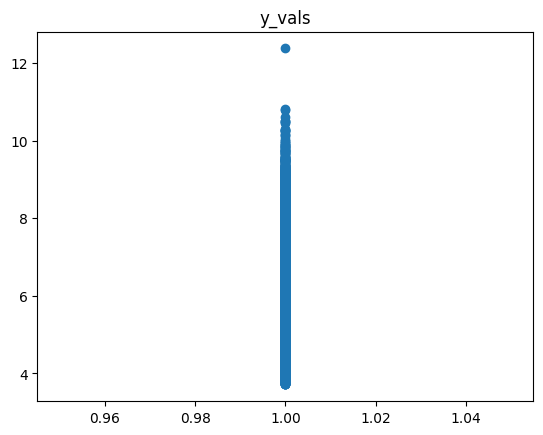

In [305]:
dif_vals=np.unique(y_train_new_filtered)
x_axis=np.ones_like(dif_vals)
plt.scatter(x_axis,dif_vals)
plt.title("y_vals")
plt.show()

C:\Users\joshi\AppData\Local\Temp\ipykernel_24052\4197994115.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_train_new_filtered, shade=True, color='orange')


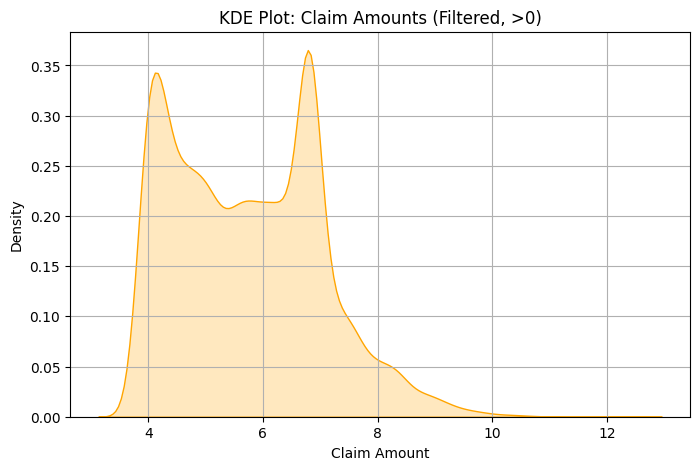

In [306]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(y_train_new_filtered, shade=True, color='orange')
plt.title("KDE Plot: Claim Amounts (Filtered, >0)")
plt.xlabel("Claim Amount")
plt.ylabel("Density")
plt.grid(True)
plt.show()


In [307]:
from scipy.stats import gaussian_kde
import numpy as np
from scipy.signal import find_peaks

data = y_train_new_filtered.values  # convert to np.array if it's a Series
kde = gaussian_kde(data)
x_vals = np.linspace(min(data), max(data), 1000)
density = kde(x_vals)

# Find peaks
peaks, _ = find_peaks(density)

print(f"Number of peaks: {len(peaks)}")


Number of peaks: 3


In [308]:

print(f"Total NaNs in residuals: {filtered_x_new.isna().sum()}")

Total NaNs in residuals: Distribution_channel_0             0
Distribution_channel_00/01/1900    0
Distribution_channel_1             0
Type_fuel_D                        0
Type_fuel_P                        0
Seniority                          0
Policies_in_force                  0
Max_policies                       0
Max_products                       0
Lapse                              0
Payment                            0
Premium                            0
N_claims_year                      0
N_claims_history                   0
Type_risk                          0
Area                               0
Second_driver                      0
Year_matriculation                 0
Power                              0
Cylinder_capacity                  0
Value_vehicle                      0
N_doors                            0
Length                             0
Weight                             0
Insurance_status                   0
Age                                0
Vehicle_age  

In [309]:
def predictions(model, model2, df):
    stage_1_pred=stage_1(X_val,model)
    y_pred=stage_2(stage_1_pred,X_val,model2)
    return y_pred

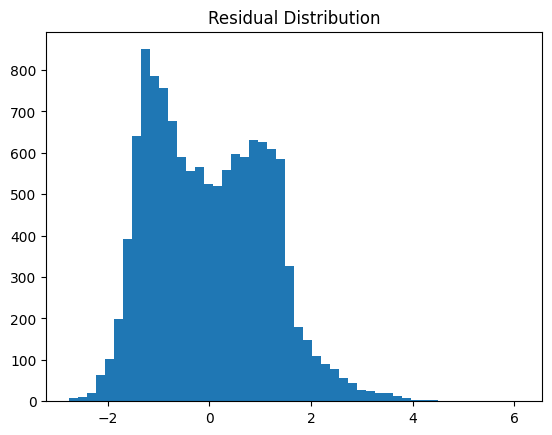

In [310]:
import matplotlib.pyplot as plt
y_pred=model2.predict(filtered_x_new)
residuals = y_train_new_filtered - model2.predict(filtered_x_new)

plt.hist(residuals, bins=50)
plt.title("Residual Distribution")
plt.show()


In [311]:
print(f"Total NaNs in residuals: {residuals.isna().sum()}")
print(f"Total NaNs in y_pred: {np.isnan(y_pred).sum()}")
print(f"Total NaNs in residuals: {y_train_new_filtered.isna().sum()}")

Total NaNs in residuals: 0
Total NaNs in y_pred: 0
Total NaNs in residuals: 0


In [312]:
print(f"Total NaNs in residuals: {residuals.isna().sum()}")

Total NaNs in residuals: 0


In [313]:
from sklearn.mixture import GaussianMixture
import numpy as np
import pandas as pd

# Convert to log-scale for better clustering if distribution is skewed
min_resid = residuals.min()

# Shift if needed
if min_resid <= -1:
    shift = abs(min_resid) + 1.01
    print(f"Shifting residuals by: {shift}")
    residuals_shifted = residuals + shift
else:
    residuals_shifted = residuals

residuals_log = np.log1p(residuals_shifted)

# Fit GMM with 3 clusters (change to 4-5 if needed)
gmm = GaussianMixture(n_components=3, random_state=42)
clusters = gmm.fit_predict(residuals.values.reshape(-1, 1))

# Add cluster labels to dataframe
filtered_x_new_clustered = filtered_x_new.copy()
filtered_x_new_clustered['cluster_trials'] = clusters


Shifting residuals by: 3.780764006830597


In [314]:
xgb = XGBRegressor(
    objective='reg:squarederror',
    verbosity=0,
    n_estimators=500,
    random_state=42
)

# Step 5: Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10]
}

# Step 6: RandomizedSearchCV
grid = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=100,
    cv=5
)

# Step 7: Fit the model
grid.fit(filtered_x_new_clustered, residuals)

# Step 8: Get best model
model3 = grid.best_estimator_
print("best_score", grid.best_score_)
print("best_params", grid.best_params_)

best_score 0.8492463548192075
best_params {'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha': 1, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


In [322]:

def predictions(model, model2, model3, X_val):
    # Stage 1 predictions
    stage_1_pred = stage_1(X_val, model)

    # Initialize the final predictions list
    final_predictions = []

    for i in range(len(X_val)):
        if stage_1_pred[i] == 0:
            # If stage 1 predicts 0, return 0
            final_predictions.append(0)
        else:
            # For non-zero stage 1 prediction, proceed
            x_sample = X_val.iloc[[i]]  # single row in DataFrame form

            # Stage 2
            y_pred_2 = stage_2(np.array([stage_1_pred[i]]), x_sample, model2)

            # Approximate residual
            residual_approx = model2.predict(x_sample)
            residual_approx_log = np.log1p(max(residual_approx[0], 0))  # prevent -inf

            # Predict cluster
            cluster_val = gmm.predict(np.array([[residual_approx_log]]))[0]

            # Add cluster info
            x_sample_clustered = x_sample.copy()
            x_sample_clustered["cluster_trials"] = cluster_val

            # Final prediction
            y_pred_final = model3.predict(x_sample_clustered)[0] + y_pred_2[0]

            final_predictions.append(y_pred_final)

    return np.array(final_predictions)
y_val_pred=predictions(model, model2, model3, X_val)

In [326]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_predictions(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    return rmse, r2

# Provide your true target values here as y_val
rmse, r2 = evaluate_predictions(y_val, y_val_pred)


RMSE: 0.8350
R² Score: 0.8678


In [324]:
zero_indices = (y_val == 0)

# Step 2: Count of actual zeroes in y_val
num_actual_zeros = zero_indices.sum()

# Step 3: Count of correct predictions (i.e., model also predicted 0)
correct_zero_predictions = (y_val_pred[zero_indices] == 0).sum()

# Step 4: Accuracy on zero values
if num_actual_zeros > 0:
    zero_prediction_accuracy = correct_zero_predictions / num_actual_zeros
else:
    zero_prediction_accuracy = None

# Display
print(f"Total number of zeros in y_val: {num_actual_zeros}")
print(f"Correctly predicted zeros: {correct_zero_predictions}")
if zero_prediction_accuracy is not None:
    print(f"Accuracy on zero predictions: {zero_prediction_accuracy:.2%}")
else:
    print("No zero values in y_val to evaluate.")

Total number of zeros in y_val: 13733
Correctly predicted zeros: 13733
Accuracy on zero predictions: 100.00%


In [328]:
y_val_pred=predictions(model, model2, model3, x_test_encoded_df)

In [329]:
zero_indices = (y_test == 0)

# Step 2: Count of actual zeroes in y_val
num_actual_zeros = zero_indices.sum()

# Step 3: Count of correct predictions (i.e., model also predicted 0)
correct_zero_predictions = (y_val_pred[zero_indices] == 0).sum()

# Step 4: Accuracy on zero values
if num_actual_zeros > 0:
    zero_prediction_accuracy = correct_zero_predictions / num_actual_zeros
else:
    zero_prediction_accuracy = None

# Display
print(f"Total number of zeros in y_val: {num_actual_zeros}")
print(f"Correctly predicted zeros: {correct_zero_predictions}")
if zero_prediction_accuracy is not None:
    print(f"Accuracy on zero predictions: {zero_prediction_accuracy:.2%}")
else:
    print("No zero values in y_val to evaluate.")

Total number of zeros in y_val: 17235
Correctly predicted zeros: 17235
Accuracy on zero predictions: 100.00%


In [331]:
y_test=np.log1p(y_test)

In [332]:
rmse, r2 = evaluate_predictions(y_test, y_val_pred)

RMSE: 0.8165
R² Score: 0.8721


C:\Users\joshi\AppData\Local\Temp\ipykernel_18780\643047209.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_train2, shade=True, color='orange')


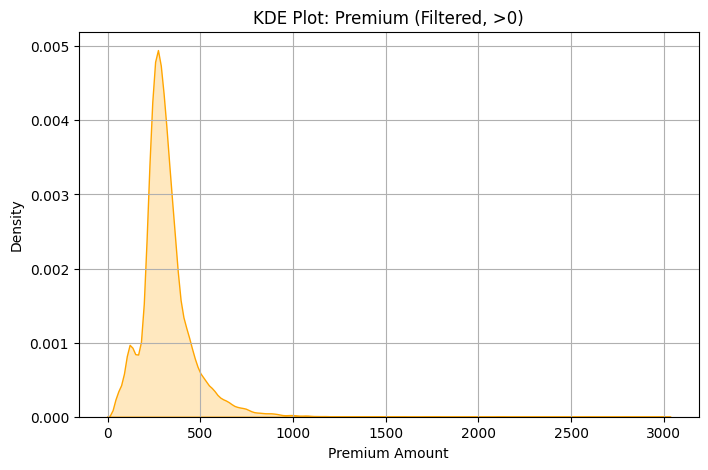

In [80]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(y_train2, shade=True, color='orange')
plt.title("KDE Plot: Premium (Filtered, >0)")
plt.xlabel("Premium Amount")
plt.ylabel("Density")
plt.grid(True)
plt.show()

In [81]:
y_train2=np.log1p(y_train2)

C:\Users\joshi\AppData\Local\Temp\ipykernel_18780\3819392389.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_train2, shade=True, color='orange')


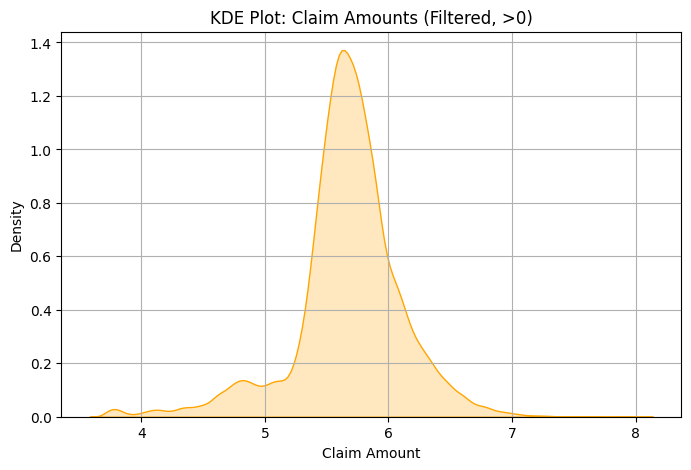

In [82]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.kdeplot(y_train2, shade=True, color='orange')
plt.title("KDE Plot: Claim Amounts (Filtered, >0)")
plt.xlabel("Claim Amount")
plt.ylabel("Density")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.linear_model import TweedieRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

def train_tweedie_model(X_train, y_train):
    # Log-transform the target to reduce skew
    y_train_log = np.log1p(y_train)

    # Standardize features manually
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Train the Tweedie Regressor
    model = TweedieRegressor(power=1.5, alpha=0.5, max_iter=1000)
    model.fit(X_train_scaled, y_train_log)

    return model, scaler

from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, scaler, X_val, y_val_log):
    # Apply same scaling to validation data
    X_val_scaled = scaler.transform(X_val)

    # Predict log-transformed target
    y_pred_log = model.predict(X_val_scaled)

    # Invert log1p to original scale
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_val_log)

    # Check for invalid values
    if not np.all(np.isfinite(y_pred)) or not np.all(np.isfinite(y_true)):
        raise ValueError("y_pred or y_true contains NaN or inf.")

    # Compute metrics
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"✅ RMSE: {rmse:.4f}")
    print(f"✅ R² Score: {r2:.4f}")

    return y_true, y_pred


# Assuming target is Premium
y_train_log = np.log1p(y_train_new)
y_val_log = np.log1p(y_val)

# Train
model, scaler = train_tweedie_model(x_train_encoded, y_train2)

# Evaluate
y_true, y_pred = evaluate_model(model, scaler,x_test_encoded, y_test2)
y_pred_log = model.predict(scaler.transform(x_test_encoded))
print("Any NaNs in prediction?", np.isnan(y_pred_log).any())
print("Any infs in prediction?", np.isinf(y_pred_log).any())


Any NaNs in prediction? False
Any infs in prediction? False


In [88]:
y_test2.isnull().sum()

np.int64(0)

In [133]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np

# === 1. Training Function with RandomizedSearchCV ===
def train_best_xgb_model(X_train, y_train, n_iter=50, cv=3, random_state=42):
    # Log-transform the target
    y_train_log = np.log1p(y_train)

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Define base model
    base_model = XGBRegressor(objective='reg:squarederror', random_state=random_state, n_jobs=-1)

    # Define hyperparameter space
    param_dist = {
        'n_estimators': [200],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 8],
    }

    # Randomized search
    search = RandomizedSearchCV(
        base_model,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring='r2',
        cv=cv,
        verbose=1,
        random_state=random_state,
        n_jobs=-1
    )

    search.fit(X_train_scaled, y_train_log)
    best_model = search.best_estimator_
    print("✅ Best Hyperparameters:", search.best_params_)

    return best_model, scaler


In [134]:
def evaluate_model(model, scaler, X_val, y_val_log):
    # Scale validation features
    X_val_scaled = scaler.transform(X_val)

    # Predict and invert log1p
    y_pred_log = model.predict(X_val_scaled)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_val_log)

    # Check for invalids
    if not np.all(np.isfinite(y_pred)) or not np.all(np.isfinite(y_true)):
        raise ValueError("y_pred or y_true contains NaN or inf")

    # Compute metrics
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"✅ RMSE: {rmse:.4f}")
    print(f"✅ R² Score: {r2:.4f}")
    return y_true, y_pred


In [135]:
# Step 1: Prepare log-transformed target
y_test_log = np.log1p(y_test2)
# Step 2: Train with randomized hyperparameter tuning
model, scaler = train_best_xgb_model(x_train_encoded, y_train2)

# Step 3: Evaluate
y_true, y_pred = evaluate_model(model, scaler, x_test_encoded, y_test_log)


c:\Users\joshi\OneDrive\Desktop\Vehicle-Insurance-MLOps-pipeline\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ Best Hyperparameters: {'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.2}
✅ RMSE: 338.4904
✅ R² Score: -4.9956


In [136]:
y_train2

72716     5.972893
95053     5.795480
98446     6.134244
41836     5.410082
16050     6.144636
            ...   
54886     5.919807
76820     5.528675
103694    5.542204
860       5.706977
15795     5.528437
Name: Premium, Length: 84444, dtype: float64

✅ RMSE: 104.8911
✅ R² Score: 0.4243
✅ Predicted Range: 50.04 to 1112.80
✅ Actual Range: 40.26 to 1972.48


In [198]:
!pip install optuna category_encoders xgboost


  Using cached optuna-4.4.0-py3-none-any.whl.metadata (17 kB)
  Using cached alembic-1.16.4-py3-none-any.whl.metadata (7.3 kB)
Using cached optuna-4.4.0-py3-none-any.whl (395 kB)
Using cached alembic-1.16.4-py3-none-any.whl (247 kB)



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import optuna
from datetime import datetime
import warnings

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_square_error, r2_score
from category_encoders import CatBoostEncoder

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import shap

warnings.filterwarnings("ignore")

# === Step 1: Feature Engineering ===
today = datetime(2020, 1, 1)

df['Insurance_status'] = df['Date_lapse'].isna().astype(int)
df['Date_lapse'] = pd.to_datetime(df['Date_lapse'], errors='coerce').fillna(today)
df['Date_lapse'] = df['Date_lapse'].mask(df['Date_lapse'] > today, today)

for col in ['Date_start_contract', 'Date_driving_licence', 'Date_last_renewal', 'Date_next_renewal']:
    df[col] = pd.to_datetime(df[col], dayfirst=True, errors='coerce')

df['Age'] = ((today - df['Date_lapse']).dt.days // 365).fillna(0).astype(int)
df['Vehicle_age'] = today.year - df['Year_matriculation']
df['Insurance_duration'] = ((df['Date_lapse'] - df['Date_start_contract']).dt.days // 30).fillna(0).astype(int)
df['Licence_age'] = ((today - df['Date_driving_licence']).dt.days // 365).fillna(0).astype(int)

df.drop(columns=[
    'Date_start_contract', 'Date_last_renewal', 'Date_next_renewal',
    'Date_driving_licence', 'Date_birth', 'Date_lapse'
], errors='ignore', inplace=True)

# Feature ratios
df['Power_per_weight'] = df['Power'] / (df['Weight'] + 1e-5)
df['Cylinder_per_age'] = df['Cylinder_capacity'] / (df['Vehicle_age'] + 1)
df['Experience_ratio'] = df['Licence_age'] / (df['Vehicle_age'] + 1)
df['Is_new_vehicle'] = (df['Vehicle_age'] == 0).astype(int)

# === Step 2: Prepare X and y ===
features = [
    'Power', 'N_doors', 'Cylinder_capacity', 'Weight', 'Year_matriculation',
    'Type_risk', 'Payment', 'Second_driver',
    'Insurance_status', 'Age', 'Vehicle_age',
    'Insurance_duration', 'Licence_age',
    'Power_per_weight', 'Cylinder_per_age', 'Experience_ratio', 'Is_new_vehicle'
]

X = df[features]
y = df['Premium']

# === Step 3: Split & Log Transform ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# === Step 4: Target Encoding + Scaling ===
cat_cols = ['Type_risk', 'Payment', 'Second_driver']
cat_encoder = CatBoostEncoder(cols=cat_cols)
X_train_enc = cat_encoder.fit_transform(X_train, y_train_log)
X_test_enc = cat_encoder.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)

# === Step 5: Define Optuna Tuner ===
def tune_model(model_class, X, y, model_name):
    def objective(trial):
        if model_name == "xgb":
            params = {
                'n_estimators': trial.suggest_int("n_estimators", 300, 1500),
                'max_depth': trial.suggest_int("max_depth", 4, 10),
                'learning_rate': trial.suggest_float("learning_rate", 0.005, 0.05, log=True),
                'subsample': trial.suggest_float("subsample", 0.6, 1.0),
                'colsample_bytree': trial.suggest_float("colsample_bytree", 0.6, 1.0),
                'reg_alpha': trial.suggest_float("reg_alpha", 0.0, 5.0),
                'reg_lambda': trial.suggest_float("reg_lambda", 0.0, 5.0),
                'min_child_weight': trial.suggest_int("min_child_weight", 1, 10)
            }
        elif model_name == "lgb":
            params = {
                'n_estimators': trial.suggest_int("n_estimators", 300, 1500),
                'max_depth': trial.suggest_int("max_depth", 4, 10),
                'learning_rate': trial.suggest_float("learning_rate", 0.005, 0.05, log=True),
                'subsample': trial.suggest_float("subsample", 0.6, 1.0),
                'colsample_bytree': trial.suggest_float("colsample_bytree", 0.6, 1.0),
                'reg_alpha': trial.suggest_float("reg_alpha", 0.0, 5.0),
                'reg_lambda': trial.suggest_float("reg_lambda", 0.0, 5.0)
            }
        elif model_name == "cat":
            params = {
                'n_estimators': trial.suggest_int("n_estimators", 300, 1000),
                'learning_rate': trial.suggest_float("learning_rate", 0.01, 0.1),
                'depth': trial.suggest_int("depth", 4, 10),
                'l2_leaf_reg': trial.suggest_float("l2_leaf_reg", 1.0, 5.0)
            }
        model = model_class(**params)
        return cross_val_score(model, X, y, cv=5, scoring='r2', n_jobs=-1).mean()

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=30, timeout=600)
    print(f"✅ Best Params for {model_name.upper()}: {study.best_params}")
    return model_class(**study.best_params)

# === Step 6: Tune All Base Models ===
xgb_model = tune_model(XGBRegressor, X_train_scaled, y_train_log, "xgb")
lgb_model = tune_model(LGBMRegressor, X_train_scaled, y_train_log, "lgb")
cat_model = tune_model(CatBoostRegressor, X_train_scaled, y_train_log, "cat")

# === Step 7: Build Stacking Regressor ===
stack_model = StackingRegressor(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('cat', cat_model)
    ],
    final_estimator=Ridge()
)

stack_model.fit(X_train_scaled, y_train_log)

# === Step 8: Predict & Evaluate ===
y_pred_log = stack_model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test_log)

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"\n📊 Final Evaluation:")
print(f"✅ Stacked RMSE: {rmse:.4f}")
print(f"✅ Stacked R² Score: {r2:.4f}")
print(f"✅ Predicted Range: {y_pred.min():.2f} to {y_pred.max():.2f}")
print(f"✅ Actual Range: {y_true.min():.2f} to {y_true.max():.2f}")

# === Step 9: SHAP Explainability for XGBoost (most interpretable) ===
print("\n🔍 Generating SHAP explanations (XGBoost)...")



[I 2025-07-14 00:12:24,763] A new study created in memory with name: no-name-ff7724fd-ae4f-45df-9d38-b526b4f35be9
[I 2025-07-14 00:12:44,384] Trial 0 finished with value: 0.6169170859754329 and parameters: {'n_estimators': 858, 'max_depth': 7, 'learning_rate': 0.02340634788423582, 'subsample': 0.8017847610302102, 'colsample_bytree': 0.6222138466790402, 'reg_alpha': 0.0045194445336121936, 'reg_lambda': 0.07269835940648561, 'min_child_weight': 4}. Best is trial 0 with value: 0.6169170859754329.
[I 2025-07-14 00:13:09,767] Trial 1 finished with value: 0.6099934858401435 and parameters: {'n_estimators': 679, 'max_depth': 9, 'learning_rate': 0.009815423613754835, 'subsample': 0.6513229604888179, 'colsample_bytree': 0.7697700517902121, 'reg_alpha': 0.46573166094105445, 'reg_lambda': 4.994312806720502, 'min_child_weight': 5}. Best is trial 0 with value: 0.6169170859754329.
[I 2025-07-14 00:13:20,201] Trial 2 finished with value: 0.5915330823553463 and parameters: {'n_estimators': 401, 'max_de

✅ Best Params for XGB: {'n_estimators': 1160, 'max_depth': 10, 'learning_rate': 0.033275614993222624, 'subsample': 0.9759172043150037, 'colsample_bytree': 0.8239006311477104, 'reg_alpha': 1.2920225771570368, 'reg_lambda': 0.13266023283593514, 'min_child_weight': 3}


[I 2025-07-14 00:23:02,967] Trial 0 finished with value: 0.6110264891836314 and parameters: {'n_estimators': 1348, 'max_depth': 7, 'learning_rate': 0.034100461877465335, 'subsample': 0.6717230208427738, 'colsample_bytree': 0.8501312688233644, 'reg_alpha': 1.7790462906559297, 'reg_lambda': 1.0012437078892689}. Best is trial 0 with value: 0.6110264891836314.
[I 2025-07-14 00:23:23,308] Trial 1 finished with value: 0.5863158541231195 and parameters: {'n_estimators': 1410, 'max_depth': 5, 'learning_rate': 0.006619616220854563, 'subsample': 0.6601098634880868, 'colsample_bytree': 0.7437475436682407, 'reg_alpha': 1.0826023581043436, 'reg_lambda': 0.5096760918020626}. Best is trial 0 with value: 0.6110264891836314.
[I 2025-07-14 00:23:39,541] Trial 2 finished with value: 0.5845502760536465 and parameters: {'n_estimators': 892, 'max_depth': 9, 'learning_rate': 0.0073314465373899435, 'subsample': 0.635855102829686, 'colsample_bytree': 0.8429490952512977, 'reg_alpha': 3.2776965195858687, 'reg_la

✅ Best Params for LGB: {'n_estimators': 1380, 'max_depth': 7, 'learning_rate': 0.04996312482814465, 'subsample': 0.70037724242371, 'colsample_bytree': 0.9445498145417329, 'reg_alpha': 0.7570986968536101, 'reg_lambda': 4.430989744600707}


[W 2025-07-14 00:31:40,534] Trial 0 failed with parameters: {'n_estimators': 515, 'learning_rate': 0.09178852995956366, 'depth': 9, 'l2_leaf_reg': 1.8294083644367882} because of the following error: The value nan is not acceptable.
[W 2025-07-14 00:31:40,535] Trial 0 failed with value np.float64(nan).
[I 2025-07-14 00:34:30,929] Trial 1 finished with value: 0.629298763554088 and parameters: {'n_estimators': 913, 'learning_rate': 0.07860611390372439, 'depth': 10, 'l2_leaf_reg': 1.3321687649497402}. Best is trial 1 with value: 0.629298763554088.
[I 2025-07-14 00:36:07,971] Trial 2 finished with value: 0.6174922650061199 and parameters: {'n_estimators': 511, 'learning_rate': 0.09725699060888607, 'depth': 10, 'l2_leaf_reg': 1.7563124491468987}. Best is trial 1 with value: 0.629298763554088.
[I 2025-07-14 00:36:32,912] Trial 3 finished with value: 0.5720894831333152 and parameters: {'n_estimators': 477, 'learning_rate': 0.01390588224102378, 'depth': 9, 'l2_leaf_reg': 1.3542817119107178}. Be

✅ Best Params for CAT: {'n_estimators': 913, 'learning_rate': 0.07860611390372439, 'depth': 10, 'l2_leaf_reg': 1.3321687649497402}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003977 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2719
[LightGBM] [Info] Number of data points in the train set: 84444, number of used features: 16
[LightGBM] [Info] Start training from score 5.668188
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
0:	learn: 0.4260839	total: 195ms	remaining: 2m 58s
1:	learn: 0.4107194	total:

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8239006311477104, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.033275614993222624,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1160, n_jobs=None,
             num_parallel_tree=None, ...)

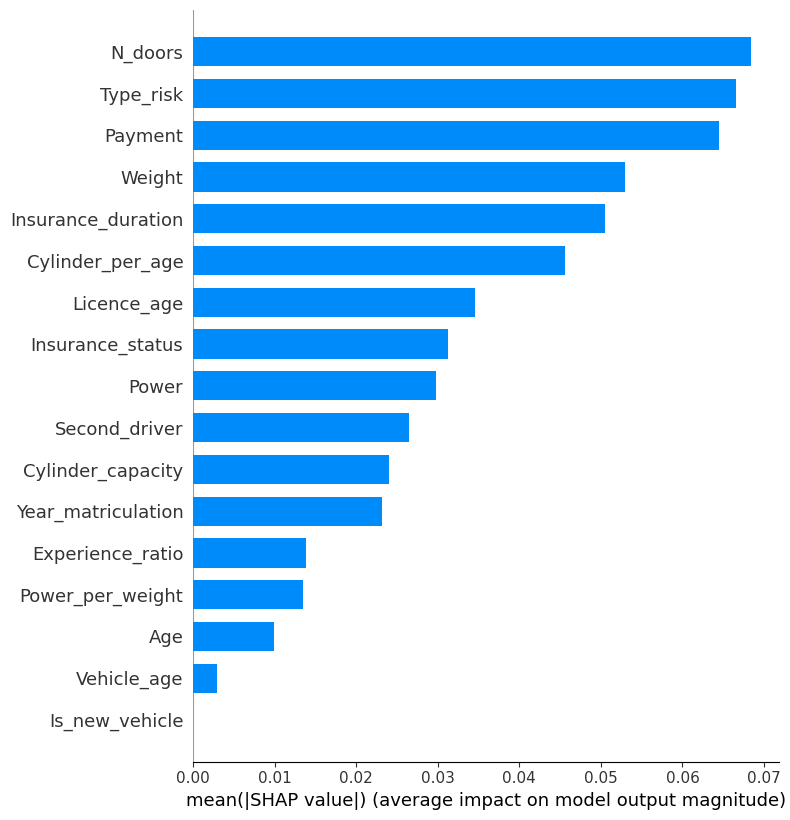

In [212]:
xgb_model.fit(X_train_scaled, y_train_log)
booster = xgb_model.get_booster()
booster.set_param({'predictor': 'cpu_predictor'})
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_scaled)

# Plot using the encoded, unscaled features
shap.summary_plot(shap_values, X_test_enc, plot_type="bar")

In [213]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on test set (log-transformed)
y_pred_log_xgb = xgb_model.predict(X_test_scaled)

# Convert back to original scale
y_pred_xgb = np.expm1(y_pred_log_xgb)
y_true = np.expm1(y_test_log)

# Evaluate
rmse_xgb = np.sqrt(mean_squared_error(y_true, y_pred_xgb))
r2_xgb = r2_score(y_true, y_pred_xgb)

print(f"✅ XGBoost Standalone RMSE: {rmse_xgb:.4f}")
print(f"✅ XGBoost Standalone R² Score: {r2_xgb:.4f}")


✅ XGBoost Standalone RMSE: 92.3743
✅ XGBoost Standalone R² Score: 0.5535
